<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a id="one"></a>
## 1. Introduction
Back to Table of Contents

Project Overview

After decades receiving little attention from non-scientists, the impacts of climate change are now widely discussed through a variety of mediums. Originating from scientific papers, newspaper articles, and blog posts, a broad spectrum of climate change opinions, subjects, and sentiments exist. Newspaper articles often dismiss or sensationalize the effects of climate change due to journalistic biases including personalization, dramatization and a need for novelty. Scientific papers portray a much more realistic and consensus view of climate change. These views, however, do not receive widespread media attention due to several factors including journal paywalls, formal scientific language, and technical results that are not easy for the general public to understand.

In the last decade, there has been a shift from the consumption of traditional mass media (newspapers and broadcast television) to the consumption of social media (blog posts, Twitter, etc.). This shift represents a switch in communications from “one-to-many” to “many-to-many”. Rather than a single journalist or scientist telling the public exactly what to think, social media offers a mechanism for many people of diverse backgrounds to communicate and form their own opinions. Exposure is a key aspect in transforming a social problem into a public issue, and social media is a potential avenue where climate change issues can be initially exposed.

In this project, we analyze a dataset that aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, we have 43943 tweets.

Problem Statement Build a model that is able to classify a person's sentiment towards climate change based on their novel tweet data.

 <a id="one"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, I will be importing the libraries that will be used throughout my analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
from multiprocesspandas import applyparallel
from comet_ml import Experiment

%matplotlib inline
# set plot style
sns.set()

# Libraries for Natural Language processing
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer
from wordcloud import WordCloud
import re
import unicodedata
from nltk.stem.snowball import SnowballStemmer
import contractions

# Libraries for data preparation and model building
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
experiment = Experiment(
    api_key="cbtJsKjDivb61gTUBXpeo48r7",
    project_name="classification-predict-streamlit-group3",
    workspace="michael-py",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/michael-py/classification-predict-streamlit-group3/42662eeebf4c4221864fd80aed77dd70



<a id="two"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section I will be loading the data from the `train_set` file into a DataFrame. |

---

In [4]:
# load the data
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')


<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [5]:
# look at data statistics
df.shape

(15819, 3)

In [6]:
df.head(5)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The information above tells us that all of the columns in our dataset contain 15,819 rows of data that are non-null, meaning we have no missing values in our dataset. This can be attested to by the information provided when we looked at the shape of the data above

In [9]:
# plot relevant feature interactions

Text(0, 0.5, 'Density')

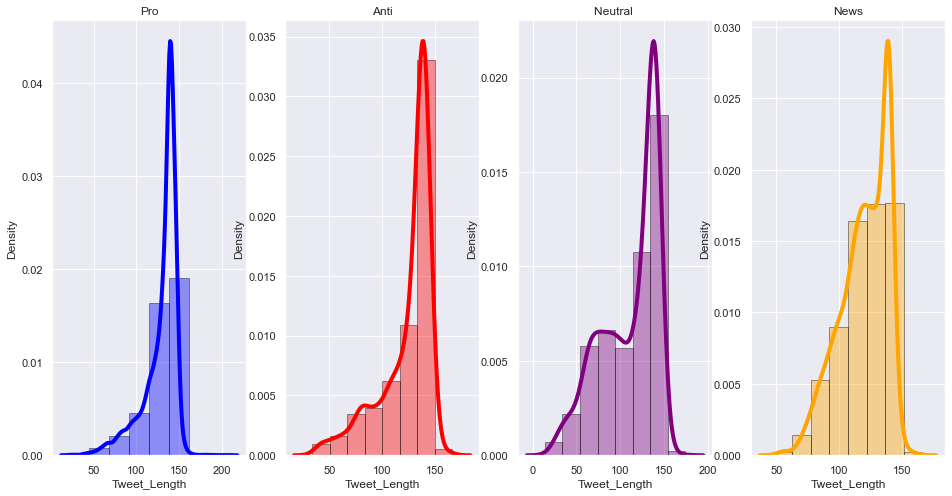

In [10]:
# Distribution plots for the labels
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#Pro 
sns.distplot(df[df['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Pro')
ax1.set_xlabel('Tweet_Length')
ax1.set_ylabel('Density')

#Anti 
sns.distplot(df[df['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'red', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Anti')
ax2.set_xlabel('Tweet_Length')
ax2.set_ylabel('Density')

#Neutral 
sns.distplot(df[df['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('Tweet_Length')
ax3.set_ylabel('Density')

#News
sns.distplot(df[df['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'orange', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('Tweet_Length')
ax4.set_ylabel('Density')

In [11]:
type_labels = list(df.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


We have 4 different labels which make up the list of all possible sentiments that can be predicted by our model(s)

-1: means it is a NEGATIVE sentiment 0: means it is a NEUTRAL sentiment 1: means it is a POSITIVE sentiment 2: means it is a FACTUAL sentiment from a reputable News Site

What are the proportions of our dataset that these labels represent? First, we will look at the figures and then we will look at a chart and barplot for better understanding

From the bar chart above, the data is observed to be unbalanced. This will be handled in the feature engineering section.

In [12]:
df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

We can see that label 1 is very highly represented (8,530) and label 2 follows not so closely (3,640), which can be a good thing because it indicates that a lot of people are speaking about climate change and are aware of its impacts on our planet. Label 0 comes in third (2,353); these tweets are neutral, having no connections with climate change or its woes.

Gladly, the negative sentiments come in tops from the bottom (1,296). These are tweets from people that do not believe in the reality of climate change or global warming

Now the chart.

Text(0.5, 1.0, 'Class Distributions')

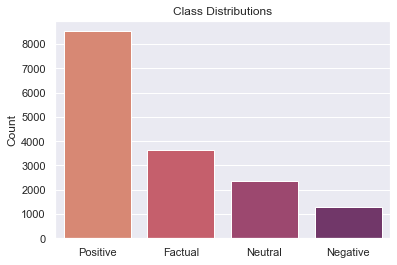

In [13]:
class_distribution = pd.DataFrame(list(df['sentiment'].value_counts()),
                          index=['Positive', 'Factual', 'Neutral', 'Negative'],
                          columns=['Count'])
sns.set()
sns.barplot(x=class_distribution.index, y=class_distribution.Count, 
           palette="flare")
plt.title('Class Distributions')

While we are glad that there are more positive comments than the neutral and negative ones combined, this poses an issue when we try to feed the data into our machine learning algorithm. This is as a result of an imbalance of the proportion of data represented by the labels in our dataset. We will dive into that further in the data engineering section; what data imbalance is and how to deal with it.

Out of curiosity, While it is intuitive to spot a postive or a negative or a neutral comment, what makes a comment factual? hmm..

Let's look further into the data and see what we find.

We will approach this by printing a sample of messages in these different comment categories and see if we can make sense of what we find.

In [14]:
positives = df['message'][df['sentiment'] == 1]
negatives = df['message'][df['sentiment'] == -1]
neutrals = df['message'][df['sentiment'] == 0]
factuals = df['message'][df['sentiment'] == 2]

print("Positive comments:")
print(f"\t{np.array(positives[:5])}\n")
print("Negative comments:")
print(f"\t{np.array(negatives[:5])}\n")
print("Neutral comments:")
print(f"\t{np.array(neutrals[:5])}\n")
print("Factual comments:")
print(f"\t{np.array(factuals[:5])}\n")

Positive comments:
	["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"
 "It's not like we lack evidence of anthropogenic global warming"
 '#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD'
 "RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"
 "Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j"]

Negative comments:
	['Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more'
 "@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!"
 'RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that 

The tweets contain lots of emojis, urls and many retweets, all these are contributing lots of noise hence they would have to be removed in the data engineering section.

In [15]:
#A function to view most frequently occured words in the tweets
def words_freq(df, n):
    import string
    stop_words = stopwords.words('english') #All english stopwords
    stop_words.append('rt')
    stop_words.append('&amp;')
    dict_ = {}
    for row in np.array(df):
        word_sw = ' '.join([l.lower() for l in row.split(' ') if l.lower() not in stop_words])
        word_punct = ''.join([l for l in word_sw if l not in string.punctuation])

        for wd in word_punct.split(" "):
            if wd in dict_:
                dict_[wd] += 1
            else:
                dict_[wd] = 1
    
    dict_ = {k: v for k,v in sorted(dict_.items(), key=lambda kv: kv[1], reverse=True)}
    n_largest = dict(list(dict_.items())[:n])
    
    return n_largest

In [16]:
pos = words_freq(positives, 60)
print(pos)

{'climate': 7328, 'change': 6873, 'global': 1592, 'warming': 1391, '': 1018, 'believe': 1000, 'trump': 877, 'going': 590, 'real': 469, 'people': 449, 'world': 443, 'us': 437, 'die': 394, 'thinking': 337, 'husband': 312, 'stephenschlegel': 307, 'httpstcosjofonã¢â‚¬â¦': 307, 'fight': 281, 'new': 281, 'like': 272, 'epa': 262, 'hoax': 252, 'sensanders': 248, 'say': 244, 'think': 234, 'need': 233, 'science': 230, 'thinks': 218, 'president': 207, 'https…': 201, 'action': 198, 'donald': 195, 'presidentelect': 192, 'right': 192, 'know': 189, 'planet': 183, 'via': 181, 'denier': 180, 'deniers': 174, 'one': 172, 'scientists': 171, 'realdonaldtrump': 164, 'stop': 164, 'still': 164, 'must': 162, 'make': 159, 'millions': 154, 'future': 154, 'tã¢â‚¬â¦': 153, 'watch': 151, 'chinese': 151, 'mr': 150, 'earth': 149, 'trumps': 147, 'take': 145, 'beforetheflood': 143, 'im': 140, 'time': 140, 'could': 137, 'would': 137}


In [17]:
neg = words_freq(negatives, 60)
print(neg)

{'climate': 781, 'change': 718, 'global': 632, 'warming': 589, '': 165, 'science': 74, 'realdonaldtrump': 68, 'us': 62, 'real': 59, 'trump': 57, 'people': 56, 'man': 52, 'would': 50, 'hoax': 50, 'scam': 49, 'made': 47, 'manmade': 46, 'data': 45, 'believe': 45, 'stevesgoddard': 44, 'make': 42, 'years': 42, 'like': 41, 'obama': 40, 'gore': 40, 'news': 35, 'al': 35, 'scientists': 35, 'money': 35, 'one': 33, 'fake': 33, 'cause': 33, 'world': 33, 'know': 32, 'tax': 31, 'chinese': 31, 'liberals': 30, 'think': 29, 'scientist': 28, 'good': 28, 'going': 28, 'left': 28, 'created': 28, 'it': 28, 'weather': 28, 'order': 27, 'leaders': 27, 'say': 26, 'due': 26, 'concept': 26, 'caused': 26, 'ice': 26, 'get': 25, 'manufacturing': 25, 'stop': 25, 'hell': 25, 'time': 24, 'manipulated': 24, 'https…': 23, 'noncompetitive': 23}


In [18]:
neu = words_freq(neutrals, 60)
print(neu)

{'climate': 1428, 'change': 1340, 'global': 1032, 'warming': 948, '': 276, 'trump': 147, 'us': 100, 'like': 96, 'real': 93, 'believe': 87, 'penguin': 84, 'think': 81, 'im': 80, 'hes': 77, 'people': 65, 'cause': 55, 'know': 52, 'one': 49, 'says': 45, 'get': 45, 'club': 44, 'new': 44, 'said': 44, 'would': 43, 'hot': 43, 'good': 39, 'world': 39, 'thing': 39, 'need': 37, 'care': 37, 'thats': 36, 'great': 36, 'right': 36, 'weather': 36, 'still': 35, 'going': 34, 'really': 34, 'want': 34, 'say': 33, 'even': 33, 'talk': 33, 'time': 32, 'much': 31, 'stop': 31, 'man': 30, 'realdonaldtrump': 30, 'hoax': 30, 'leonardo': 30, 'tell': 30, 'make': 30, 'science': 29, 'asked': 28, 'u': 28, 'today': 28, 'epa': 28, 'it': 27, 'cant': 27, 'cold': 26, 'what': 26, 'see': 26}


In [19]:
fact = words_freq(factuals, 60)
print(fact)

{'climate': 3324, 'change': 3100, 'trump': 825, '': 677, 'global': 503, 'warming': 418, 'us': 290, 'via': 286, 'says': 240, 'epa': 235, 'new': 190, 'scientists': 175, 'trumps': 165, 'donald': 162, 'fight': 158, 'china': 142, 'could': 133, 'news': 121, 'world': 113, 'scott': 112, 'paris': 110, 'chief': 100, 'energy': 100, 'president': 100, 'study': 97, 'pruitt': 96, 'science': 94, 'may': 93, 'plan': 88, 'thehill': 82, 'agreement': 79, 'carbon': 78, 'cnn': 78, 'exxon': 78, 'head': 76, 'obama': 76, 'environment': 73, 'https…': 72, 'tillerson': 71, 'house': 69, 'report': 69, 'change…': 68, 'reuters': 67, 'un': 66, 'website': 64, 'order': 64, 'back': 64, 'climatechange': 63, 'trump’s': 63, 'say': 62, 'guardian': 62, 'years': 59, 'due': 59, 'rex': 58, 'leaders': 58, 'dioxide': 56, 'white': 55, 'government': 55, 'arctic': 55, 'action': 55}


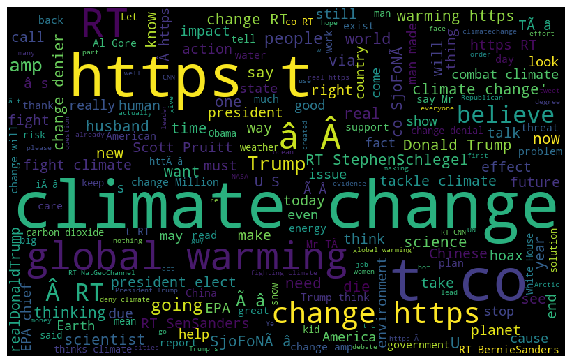

In [20]:
all_words = ' '.join([text for text in df['message']])
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10 , 7))
plt.imshow(wordcloud, interpolation = 'none')
plt.axis('off')
plt.show()

The data is observed to be pretty noisy. All the noise will be taken care of in the data engineering section.

In [21]:
# how many links there are
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
urls = []
for row in df['message']:
    match = re.findall(pattern_url, row)
    for item in match:
        urls.append(item)

total_links = len(urls)
print(total_links)

9673


There are lots of links present in the data set

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section I will be cleaning the dataset, and possibly create new features. |

---

Twitter handles, stopwords, hyperlinks, special and repeated characters in tweets,
duplicate hashtags and tweets , empty spaces and retweets entities will be removed.

Bots and detection and removal, tokenization , stemming and part of speech tagging will be conducted.

Bots contained in the twitter data were detected using Botometer

gettokens( in the Syuzhet library will be applied to tokenize the tweets into a set of unigrams.

The stemDocuments( ) in the 'tm' library within the R package is applied for stemming.


In [23]:
#Converts all tweets to lower case characters
df['message'] = df['message'].str.lower()
df1['message'] = df1['message'].str.lower()

In [24]:
#Removes all urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
df['message'] = df['message'].replace(to_replace = pattern_url, value = '', regex = True)
df1['message'] = df1['message'].replace(to_replace = pattern_url, value = '', regex = True)

In [25]:
def remove_handles(tweet):
        tweet = re.sub('@[^\s]+','',str(tweet))
        
        return tweet


In [26]:
#Removing the handles
df['message'] = df['message'].apply(remove_handles)
df1['message'] = df1['message'].apply(remove_handles)

In [30]:
import string
#Removing puntuations
def remove_punctuation(tweet):
    return ''.join([l for l in tweet if l not in string.punctuation])

In [31]:
df['message'] = df['message'].apply(remove_punctuation)
df1['message'] = df1['message'].apply(remove_punctuation)

In [32]:
#Removing all emojis
regrex_pattern =  "["u"\U0001F600-\U0001F64F"   u"\U0001F600-\U0001F64F"  u"\U0001F300-\U0001F5FF"  u"\U0001F680-\U0001F6FF"  u"\U0001F1E0-\U0001F1FF" u"\U0001F1F2-\U0001F1F4" u"\U0001F1E6-\U0001F1FF"  u"\U0001F600-\U0001F64F" u"\U00002702-\U000027B0" u"\U000024C2-\U0001F251"u"\U0001f926-\U0001f937"u"\U0001F1F2" u"\U0001F1F4"u"\U0001F620"u"\u200d"u"\u2640-\u2642""]+"

df['message'] = df['message'].replace(to_replace = regrex_pattern, value = '', regex = True)
df1['message'] = df1['message'].replace(to_replace = regrex_pattern, value = '', regex = True)

In [33]:
positives = df['message'][df['sentiment'] == 1]
negatives = df['message'][df['sentiment'] == -1]
neutrals = df['message'][df['sentiment'] == 0]
factuals = df['message'][df['sentiment'] == 2]

print("Positive comments:")
print(f"\t{np.array(positives [:10])}\n")
print("Negative comments:")
print(f"\t{np.array(negatives [:10])}\n")
print("Neutral comments:")
print(f"\t{np.array(neutrals [:10])}\n")
print("Factual comments:")
print(f"\t{np.array(factuals[:10])}\n")  

Positive comments:
	['polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what  via '
 'its not like we lack evidence of anthropogenic global warming'
 'todayinmaker wired  2016 was a pivotal year in the war on climate change '
 'rt  its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight'
 'worth a read whether you do or dont believe in climate change  '
 'rt  mike pence doesn’t believe in global warming or that smoking causes lung cancer '
 'rt  six big things we can all do today to fight climate change or how to be a climate activistã¢â‚¬â¦  hã¢â‚¬â¦'
 ' my 8yo nephew is inconsolable he wants to die of old age like me but will perish in the fiery hellscape of climate change'
 'rt  no offense… but like… how do you just not believe… in global warming………'
 'rt  shes thinking about how shes going to die because your husband doesnt believe in climate change ã¢â‚¬â¦']

Negative comments:
	['sally kohn’s latest

In [40]:
def word_cloud(data, sentiment, amount, reverse):
    # Create a variable to store each sentiment
    data = data[data['sentiment'] == sentiment]
    # Instantiate countvectorizer object
    cv = CountVectorizer()
    # fit vectorizer object to data
    cv_data = cv.fit_transform(data.message)
    # sort countvectorizer dictionary
    dict_ = {k:v for k,v in sorted(cv.vocabulary_.items(),key = lambda item: item[1],reverse = reverse)}
    # Select the amount of words to see
    word_list = [word for word in dict_.keys()][:amount]
    # join words in the list to form a dataframe
    text = " ".join(word for word in word_list)
    # Instantiate wordcloud object
    word_cloud = WordCloud(collocations =False,
                          background_color = 'White',
                          width=400, 
                          height=300, 
                          contour_width=2, 
                          contour_color='steelblue')
    # generate wordcloud images
    return word_cloud.generate(text)

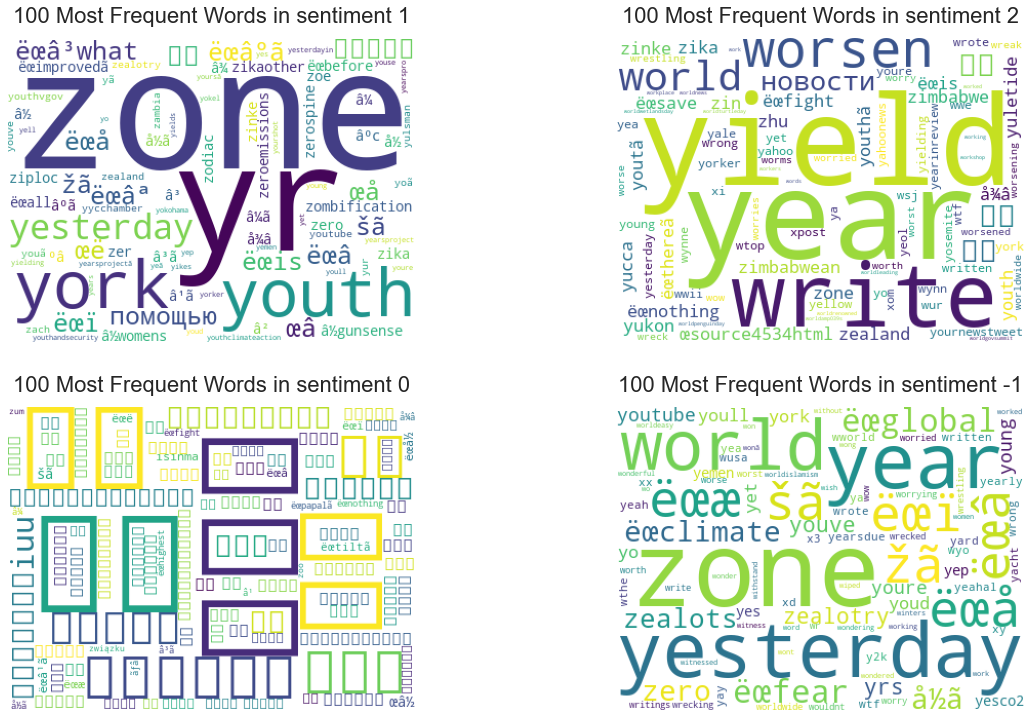

In [41]:
from wordcloud import WordCloud 
# Create Plot
size = df.sentiment.nunique()
amount = 100  #Change this number to reduce or increase the amount of words plotted 
plot = list(df.sentiment.unique())
fig = plt.figure(figsize=(20,20 * size // 3))
for index, column in enumerate(plot):
    ax = fig.add_subplot(size, 2, index + 1)
    wordcloud = word_cloud(df, column, amount, True) # True implies plot the most frequent n_words
    ax.imshow(wordcloud)
    plt.title('{} Most Frequent Words in sentiment {}'.format(amount,column), size = 22, pad =15)
    ax.axis('off')


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [140]:
vect = CountVectorizer()
vect.fit(df['message'])
new = vect.transform(df['message'])
new2 = vect.transform(df1['message'])
new3 = new2.toarray()

In [142]:
X = new
y = df['sentiment']

In [143]:
X.shape

(15819, 16908)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.000001, random_state=5)

In [153]:
naive_model = MultinomialNB(alpha = 1).fit(X_train , y_train)
ypred = naive_model.predict(new3)

In [154]:
from sklearn.metrics import accuracy_score
print('Accuracy of Naive Classifier: {:.2f}'.format(accuracy_score(y[:10546], ypred)))

Accuracy of Naive Classifier: 0.43


In [155]:
output4 = pd.DataFrame({'sentiment': ypred}) 
output4 = df1[['tweetid']]
output4['sentiment'] = ypred
output4.to_csv('logreg1.csv', index=False)
output4.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [ ]:
output4.shape

In [160]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf' , C = 15 )
svc.fit(X_train, y_train)
y_pred = svc.predict(new3)

In [161]:
output5 = df1[['tweetid']]
output5['sentiment'] = y_pred
output5.to_csv('SVC1.csv', index=False)

In [162]:
print('Accuracy of Naive Classifier: {:.2f}'.format(accuracy_score(y[:10546], y_pred)))

Accuracy of Naive Classifier: 0.40


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic